# Outliers Analysis   
Outliers could introduce biased analysis, and also our final models. So, it is important to solve this issue using appropriate techniques. In fact, these outliers often carry some interesting insights, so removing them might not the right solution.  

Here we are going to look at the following techniques to solve the  problem for outliers:   
-  Log transformation  
- Binning    
For demonstration purpose, we are going to do the whole preprocessing for only one feature (**fare**)


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
# Import data 
titanic = pd.read_csv('../data/titanic.csv')

In [5]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Use histogram to understand the distributions  

##### Age feature

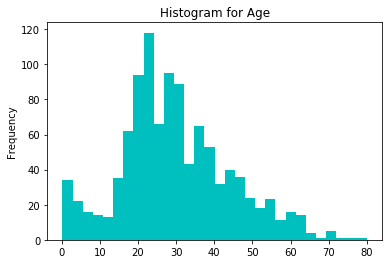

In [9]:
 titanic.age.plot(kind='hist', title='Histogram for Age', 
                  bins=30, color='c')

We can see that most of the **age** values are in the [20, 30s] and a very few are in [70, 80s]. 
Let's have have a look a those passengers where their age is more than 70. 

In [8]:
titanic.loc[titanic.age > 70]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,NaN,171.0,NaN
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN


We have 6 passengers in the results, with 2 survivors (survived=1) and 4 who did not survive (survived=0)

##### Fare 

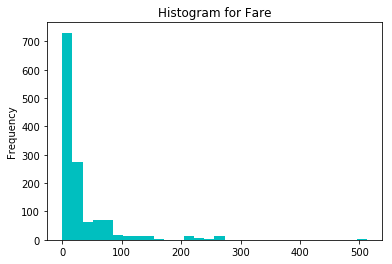

In [10]:
 titanic.fare.plot(kind='hist', title='Histogram for Fare', 
                  bins=30, color='c')

We can see that there are few passengers who have paid exceptional high fare (more than 400) than the rest of the others!  
Let's also create a Boxplot for passenger fare.  

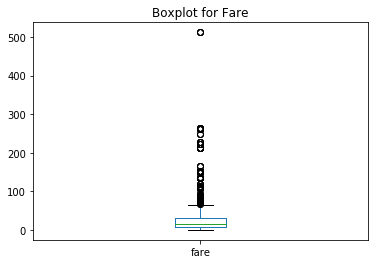

In [13]:
 titanic.fare.plot(kind='box', title='Boxplot for Fare')

We can identify many outliers, but there is one (with the value of 500) which is significantly far from the others.   
Let's try to find interesting information about those outliers.

In [14]:
titanic.loc[titanic.fare == titanic.fare.max()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


There are 4 passengers who have paid a very high fare of 512, moreover, they have the same ticket number, and were also in the **First class**. This might a family that booked in last moment. Then, all of them survived to the tragedy.   


### Transformation of outliers   
By looking at the fare histogram, we can see that we have a very right skewed distribution, so we can reduce the skeweness by applying some kind of transformation. As we know that the passenger fare will never be negative, then, we can apply the **Log** transformation technique.  

#### Log transformation

In [15]:
# LOG Transformation
'''
Adding 1.0 to accomodate zero fares, because log(0) is not defined
'''
Log_fare = np.log(titanic.fare + 1.0)  

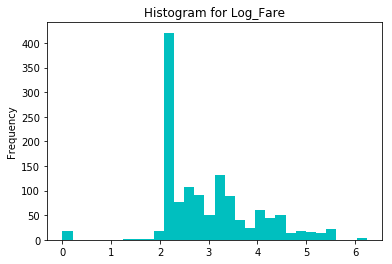

In [16]:
# Let's look at the histogram of the Log transformation
Log_fare.plot(kind='hist', title='Histogram for Log_Fare', 
                  bins=30, color='c')

We can see that our resultant histogram is less skewed than the original one (before transformation)   

#### Binning   
This is also a very useful technique for outliers treatment. We can the **binning** by using the pandas **qcut** function, that performs quantile-based binning. 
Here we are splitting the passenger fare in 4 bins, where each bin contains almost equal number of observations. 

In [17]:
pd.qcut(titanic.fare, 4)

0       (31.275, 512.329]
1       (31.275, 512.329]
2       (31.275, 512.329]
3       (31.275, 512.329]
4       (31.275, 512.329]
              ...        
1304      (7.896, 14.454]
1305      (7.896, 14.454]
1306      (-0.001, 7.896]
1307      (-0.001, 7.896]
1308      (-0.001, 7.896]
Name: fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

We can see that pandas has created 4 bins, and each observation has been added into one bin. 
This technique also allows us to specify a name for each bin.  
To do so, we are going to create the following ones which are self explanatory: very_low_fare, low_fare, high_fare, vey_high_fare. Such technique is known as **discretization**. 

In [18]:
pd.qcut(titanic.fare, 4, 
        labels = ['very_low_fare', 'low_fare', 
                  'high_fare', 'vey_high_fare'])

0       vey_high_fare
1       vey_high_fare
2       vey_high_fare
3       vey_high_fare
4       vey_high_fare
            ...      
1304         low_fare
1305         low_fare
1306    very_low_fare
1307    very_low_fare
1308    very_low_fare
Name: fare, Length: 1309, dtype: category
Categories (4, object): [very_low_fare < low_fare < high_fare < vey_high_fare]

Here, we can see that pandas has assigned each observation, one label. So, we have created a categorical feature, where each fare value corresponds to a categorical level (ordinal).  
Now, we can visualize the number of fare value for each category.

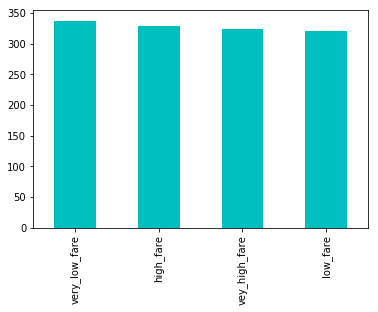

In [21]:
fare_labels = ['very_low_fare', 'low_fare','high_fare', 'vey_high_fare'] 

pd.qcut(titanic.fare, 4, labels=fare_labels). \
        value_counts().plot(kind='bar', color='c')

We can see that we have almost the same number of observations in each bin.  
Now that we have analysed and preprocessed the fare feature, we can now create a new feature corresponding to that preprocessed value, and remove the old one.  

In [22]:
titanic['fare_bin'] = pd.qcut(titanic.fare, 4, fare_labels)